# Tasks AFL-2 (Pak Edwin)
-------------------------------------------


Import library yang dibutuhkan

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from kneed import KneeLocator

#%pip install pandas scikit-learn

Import dan load dataset

In [208]:
# Ganti 'nama_file.csv' dengan nama file CSV yang tersimpan di laptop
file_path = "C:/Users/Asuspc/OneDrive/Documents/Data Mining 2023_2024/Week 8_AFL2_Pak Edwin/customer_analysis.csv"

# Membaca file CSV dan menyimpan datanya dalam sebuah DataFrame
df1 = pd.read_csv(file_path, delimiter="\t")
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Data Cleaning and preparation

In [209]:
# 1. Missing Values
df1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

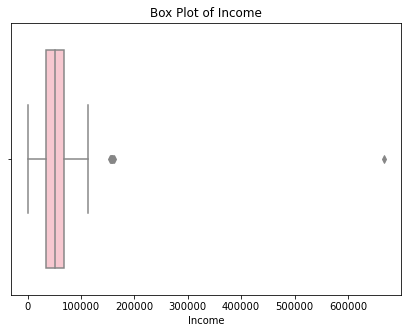

In [210]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df1['Income'], color='pink')
plt.title('Box Plot of Income')
plt.show()

In [211]:
# fixing the missing values by filling them with median because there's an outlier

imputer = SimpleImputer(strategy='median') 
df1['Income'] = imputer.fit_transform(df1[['Income']])
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [212]:
# there're no missing values anymore
df1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [213]:
# 2. Date_time format
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format="%d-%m-%Y")

df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [214]:
# 3. Categorical feature that needs to be encoded into numerical format

type = (df1.dtypes == 'object')
object_value = list(type[type].index)
print(f'Categorical feature in the Dataset:-{object_value}')


Categorical feature in the Dataset:-['Education', 'Marital_Status']


# Feature Engineering (Create/Remove feature from available data)

1. Age Extraction

We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth."

In [215]:
# Calculate the current year
current_year = datetime.now().year

# Calculate the age by subtracting the birth year from the current year
df1['Age'] = current_year - df1['Year_Birth']

# Display the DataFrame
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


2. Spending Power 

Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.

In [216]:
# Calculate the total expenditure for each customer over the past two years
df1['Spent'] = df1['MntWines'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

# Display the resulting DataFrame
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,69,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,58,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,39,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,42,422


3. Household Living Arrangement

Craft "Living_With" from "Marital_Status," revealing the living arrangements of valued couples.

In [217]:
# revealing the living arrangements of valued couples
df1['Living_With'] = df1['Marital_Status'].replace({'Absurd':'Alone',
                                                    'Alone':'Alone', 
                                                    'Divorced':'Alone',
                                                    'Married':'Partner',
                                                    'Single':'Alone',
                                                    'Together':'Partner',
                                                    'Widow':'Alone', 
                                                    'YOLO':'Alone'})

df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,66,1617,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,69,27,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,776,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,39,53,Partner
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,422,Partner


4. Family Dynamics

"Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.

In [218]:
# Calculate the number of children in a household, encompassing both the young ones and teenagers
df1['Children'] = df1['Kidhome'] + df1['Teenhome']

# Display the resulting DataFrame
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,66,1617,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,69,27,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,776,Partner,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,39,53,Partner,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,422,Partner,1


5. Family Unity

"Family_Size" will take shape, providing insights into the size and structure of each household.

In [219]:
# providing insights into the size and structure of each household.
df1['Family_Size'] = df1['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df1['Children']

# Display the resulting DataFrame
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,66,1617,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,69,27,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,776,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,39,53,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,422,Partner,1,3


6. Parental Status

"Is_Parent" will be born, simplifying the journey of parenthood for our customers.

In [220]:
# for counting the journey of parenthood by using the Children column
# 0 = don't have parenthood journey 
# 1 = have parenthood journey

df1['Is_Parent'] = df1['Children'].apply(lambda x: 1 
                                         if x > 0 
                                         else 0)

df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,66,1617,Alone,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,69,27,Alone,2,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,776,Partner,0,2,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,39,53,Partner,1,3,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,422,Partner,1,3,1


7. Educational Evolution

"Education" will undergo a transformation, restructured into three distinct categories for clarity.

In [221]:
# three distinct categories for clarity = Undergraduate, Graduate, Postgraduate

df1['Education'] = df1['Education'].replace({'2nd Cycle':'Undergraduate',
                                             'Basic':'Undergraduate',
                                             'Graduation':'Graduate',
                                             'Master':'Postgraduate',
                                             'PhD':'Postgraduate'})

df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,66,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,69,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,39,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,422,Partner,1,3,1


8. Farewell to Redundancy

We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.

In [222]:
redundant_features = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Complain','MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response',
                      'Z_CostContact', 'Z_Revenue'] 

df1.drop(columns = redundant_features, inplace=True)

df1

,Education,Income,Recency,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,88,3,8,10,4,7,66,1617,Alone,0,1,0
1,Graduate,46344.0,38,1,2,1,1,2,5,69,27,Alone,2,3,1
2,Graduate,71613.0,26,21,1,8,2,10,4,58,776,Partner,0,2,0
3,Graduate,26646.0,26,3,2,2,0,4,6,39,53,Partner,1,3,1
4,Postgraduate,58293.0,94,27,5,5,3,6,5,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,118,2,9,3,4,5,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,56,0,7,8,2,5,7,77,444,Partner,3,5,1
2237,Graduate,56981.0,91,12,1,2,3,13,6,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,8,30,2,6,5,10,3,67,843,Partner,1,3,1


# Data Preparation

1. Label Encoding

Translate categorical features into numbers so that your algorithms can work their magic.

In [223]:
# Categorical feature that needs to be encoded into numerical format

type = (df1.dtypes == 'object')
object_value = list(type[type].index)
print(f'Categorical feature in the Dataset:-{object_value}')

Categorical feature in the Dataset:-['Education', 'Living_With']


In [224]:
label_encoder = LabelEncoder()

# Encoding label for Column Education
df1['Education'] = label_encoder.fit_transform(df1['Education'])

# Encoding label for Column Living_With
df1['Living_With'] = LabelEncoder().fit_transform(df1['Living_With'])

df1.head()

,Education,Income,Recency,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,58,88,3,8,10,4,7,66,1617,0,0,1,0
1,1,46344.0,38,1,2,1,1,2,5,69,27,0,2,3,1
2,1,71613.0,26,21,1,8,2,10,4,58,776,1,0,2,0
3,1,26646.0,26,3,2,2,0,4,6,39,53,1,1,3,1
4,2,58293.0,94,27,5,5,3,6,5,42,422,1,1,3,1


2. Scaling

Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.

In [225]:
scaler = StandardScaler()

selected_data = df1.select_dtypes(include=['number']).columns.tolist()
df1[selected_data] = scaler.fit_transform(df1[selected_data])

df1.head()

,Education,Income,Recency,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.504330,0.235696,0.307039,1.476500,0.349414,1.409304,2.510890,-0.550785,0.693904,0.985345,1.679417,-1.346874,-1.264505,-1.759115,-1.584605
1,-0.504330,-0.235454,-0.383664,-0.631503,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.235733,-0.961275,-1.346874,1.396361,0.446548,0.631072
2,-0.504330,0.773999,-0.798086,-0.146905,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.317643,0.282673,0.742460,-1.264505,-0.656283,-1.584605
3,-0.504330,-1.022355,-0.798086,-0.583043,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-1.268149,-0.918094,0.742460,0.065928,0.446548,0.631072
4,0.980163,0.241888,1.550305,-0.001525,1.384715,0.329427,0.115638,0.064556,-0.130463,-1.017761,-0.305254,0.742460,0.065928,0.446548,0.631072


3. Dimensionality Reduction

Creating a smaller, more manageable subset of data, simplifying the complexity for smoother analysis. (may or may not be used)

In [226]:
pca = PCA(n_components=2) # because we need to focus on 2 components only for making the data smaller and simple 
pca.fit(df1)

df_pca= pd.DataFrame(pca.fit_transform(df1), columns=(["PCA1", "PCA2"]))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2240.0,3.965082e-17,2.267431,-5.921123,-1.719743,0.548409,1.932547,6.002813
PCA2,2240.0,2.844947e-17,1.467087,-4.122134,-1.008026,-0.121861,0.961061,5.978082


In [227]:
df_pca.head()

,PCA1,PCA2
0,-3.473698,-0.130309
1,2.001934,-0.459645
2,-2.253170,-0.166063
3,1.987296,-0.878520
4,0.509587,1.129422


# Clustering

1. Elbow Method 

We'll pinpoint the ideal number of clusters.

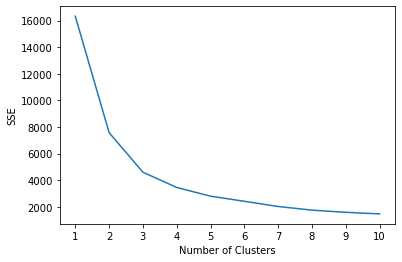

In [228]:
# set the parameter for evaluating K

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

# check the inertia for each K

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df_pca)
    SSE.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [229]:
# using kneelocator to find the elbow/knee

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('The best k for your model is', findknee.elbow)

The best k for your model is 3


In [230]:
# Training the K-Means model on a dataset with the number of clusters you specify

km_model = KMeans(n_clusters = 4, random_state=1)
y_kmeans = km_model.fit_predict(df_pca)

y_kmeans

array([1, 3, 1, ..., 1, 2, 0])

2. Agglomerative Clustering

The heart of our clustering journey.

In [231]:
# Perform hierarchical clustering with Euclidean metrics and the number of clusters is the same as Kmeans clusters
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
y_ag = ag.fit_predict(df_pca)

# Display in dataframe form the conclusions from clusters with the same criteria as the conclusions above
df_pca['Cluster'] = y_ag

df_pca

,PCA1,PCA2,Cluster
0,-3.473698,-0.130309,1
1,2.001934,-0.459645,0
2,-2.253170,-0.166063,1
3,1.987296,-0.878520,0
4,0.509587,1.129422,2
...,...,...,...
2235,-1.134236,1.577152,2
2236,2.421306,4.248669,2
2237,-2.419388,-1.803656,1
2238,-1.115055,1.662201,2


3. Scatter Plot Revelations

We'll unveil the cluster patterns using scatter plots. 

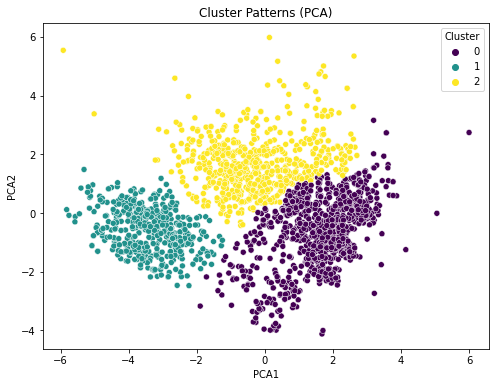

In [232]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=y_ag, palette='viridis')
plt.title('Cluster Patterns (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Visualization

1. Use scatterplot to evaluate my clustering models

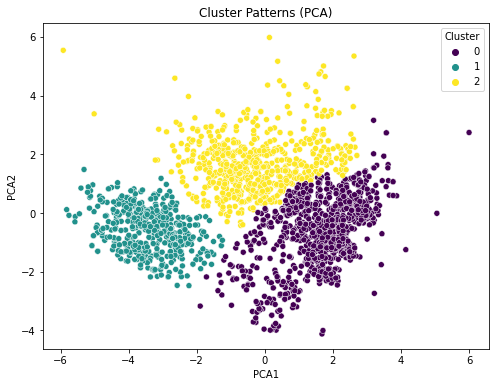

In [233]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=y_ag, palette='viridis')
plt.title('Cluster Patterns (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

2. Draw distribution of cluster chart using countplot

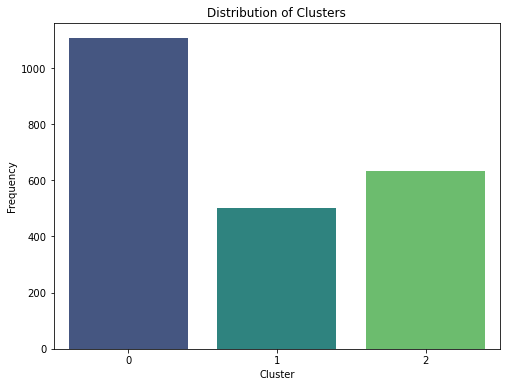

In [234]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_pca, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

3. Profiling between income and spending cluster

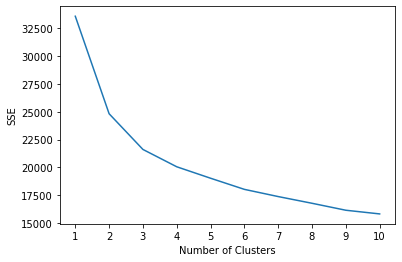

In [235]:
# set the parameter for evaluating K

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

# check the inertia for each K

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [236]:
# using kneelocator to find the elbow/knee

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('The best k for your model is', findknee.elbow)

The best k for your model is 3


In [237]:
# Perform hierarchical clustering with Euclidean metrics and the number of clusters is the same as Kmeans clusters
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
y_ag = ag.fit_predict(df1)

# Display in dataframe form the conclusions from clusters with the same criteria as the conclusions above
df1['Cluster'] = y_ag

df1.head()

,Education,Income,Recency,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Cluster
0,-0.504330,0.235696,0.307039,1.476500,0.349414,1.409304,2.510890,-0.550785,0.693904,0.985345,1.679417,-1.346874,-1.264505,-1.759115,-1.584605,1
1,-0.504330,-0.235454,-0.383664,-0.631503,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.235733,-0.961275,-1.346874,1.396361,0.446548,0.631072,0
2,-0.504330,0.773999,-0.798086,-0.146905,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.317643,0.282673,0.742460,-1.264505,-0.656283,-1.584605,1
3,-0.504330,-1.022355,-0.798086,-0.583043,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-1.268149,-0.918094,0.742460,0.065928,0.446548,0.631072,0
4,0.980163,0.241888,1.550305,-0.001525,1.384715,0.329427,0.115638,0.064556,-0.130463,-1.017761,-0.305254,0.742460,0.065928,0.446548,0.631072,0


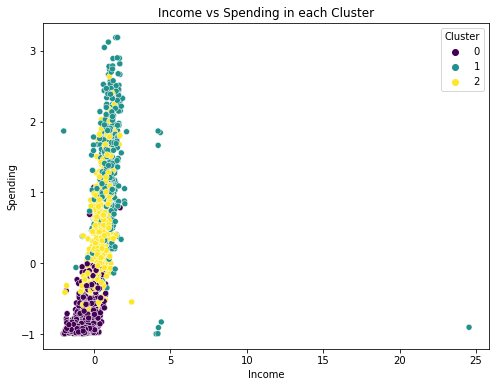

In [238]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', hue='Cluster', data=df1, palette='viridis')
plt.title('Income vs Spending in each Cluster')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()